## 1. Import Libraries


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load Data


In [4]:
data=pd.read_csv("car_prices.csv")
# Display the first few rows of the dataset
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## 3. Data Preprocessing
### 3.1. Overview of Data

In [6]:
# Get a summary of the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


### 3.2. Handle Missing Values


In [8]:
missing_values = data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


In [9]:
## the number of null values in vin,sellingprice and saledate is less compared to total data, hence dropping
data = data.dropna(subset=['vin'])
data=data.dropna(subset=['sellingprice','saledate'])

In [10]:
#The lost data in mmr is replaced with selling price

data['mmr'] = data['mmr'].fillna(data['sellingprice'])


In [11]:
#missing data in color and interior is matched with the most occuring ones

color_mode = data['color'].mode()[0]
interior_mode = data['interior'].mode()[0]

In [12]:
data['color'] = data['color'].fillna(color_mode)
data['interior'] = data['interior'].fillna(interior_mode)


In [13]:
#missing data in condition is filled with the minimum value in condition

data["condition"]=data["condition"].fillna(data["condition"].min());

In [14]:
#mean value is added to missing odometer valeus

data["odometer"]=data["odometer"].fillna(data["odometer"].mean())

In [15]:
# null values in make,model,trim,body ,transmission is set as "not available"


data[['make', 'model', 'trim', 'body', 'transmission']]=data[['make', 'model', 'trim', 'body', 'transmission']].fillna("Not Available")

### 3.3. Check for Duplicates


In [17]:
# Check for duplicate rows
duplicates = data[data.duplicated()]


In [18]:
duplicates.size


0

## 4.Data Analysis 


In [20]:
data["saledate2"]=data["saledate"].str.split("G").str[0]
data["saledate2"] = pd.to_datetime(data["saledate2"], errors='coerce')
print(data["saledate2"].isna().sum())
data.isnull().sum()


22


year             0
make             0
model            0
trim             0
body             0
transmission     0
vin              0
state            0
condition        0
odometer         0
color            0
interior         0
seller           0
mmr              0
sellingprice     0
saledate         0
saledate2       22
dtype: int64

In [21]:
data= data.dropna(subset=['saledate2'])


In [22]:
data.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
saledate2       0
dtype: int64

In [23]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 558799 entries, 0 to 558836
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   year          558799 non-null  int64         
 1   make          558799 non-null  object        
 2   model         558799 non-null  object        
 3   trim          558799 non-null  object        
 4   body          558799 non-null  object        
 5   transmission  558799 non-null  object        
 6   vin           558799 non-null  object        
 7   state         558799 non-null  object        
 8   condition     558799 non-null  float64       
 9   odometer      558799 non-null  float64       
 10  color         558799 non-null  object        
 11  interior      558799 non-null  object        
 12  seller        558799 non-null  object        
 13  mmr           558799 non-null  float64       
 14  sellingprice  558799 non-null  float64       
 15  saledate      558799 n

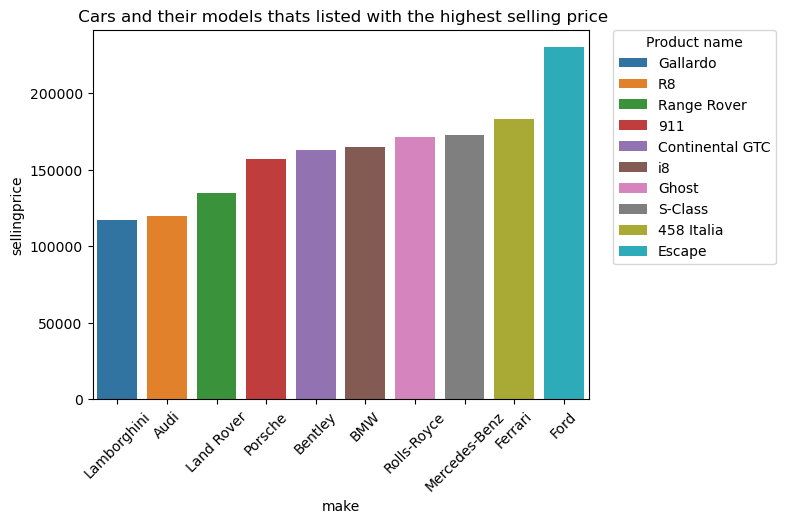

In [24]:
#make a groupby using [make,model] and selling price max, and storing in a dataframe d22, this df now has all combinations of make,model

d22=data.groupby(['make','model'])["sellingprice"].max().reset_index()

#now from the d22, select those specific make/cars aong all make,model combination that has the highest selling price,in d23

d23=d22.groupby("make")["sellingprice"].max().reset_index()

#now from the d23, sort those in desc order, to that make with the highest selling prices comes first

d23=d23.sort_values(by="sellingprice",ascending=False)

# choose the top ten (make, selling price) based on selling price sort desc

d23=d23.head(10)

# now merge this d23 with top ten highest selling prices, with the first dataset d22, that has all combi of (make,model,selling price), 
#so you ll get a new df that has only those specific combi of (make,model,highest selling price) which 
#has the highest selling price among all (make,modelselling price)

d24= pd.merge(d22,d23, on=['make','sellingprice'], how='inner')
d24=d24.reset_index(drop=True)

#now select the top ten
d24=d24.sort_values(by='sellingprice').head(10)

y=sns.barplot(x= 'make',y='sellingprice', data=d24,hue="model")
plt.title(" Cars and their models thats listed with the highest selling price")
y.legend(title='Product name', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.xticks(rotation=45);

#### Ford Escape was listed with the highest selling price

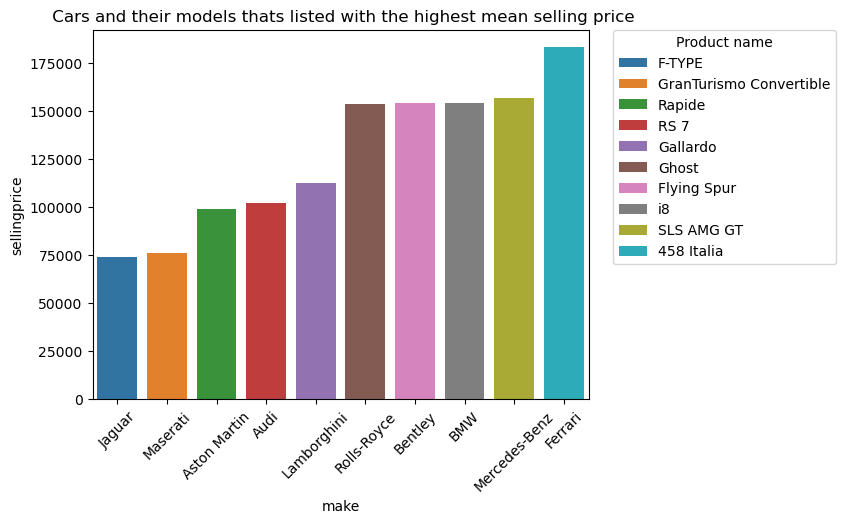

In [26]:
#make a groupby using [make,model] and selling price mean, and storing in a dataframe d22, this df now has all combinations of make,model

d22=data.groupby(['make','model'])["sellingprice"].mean().reset_index()

#now from the d22, select those specific make/cars aong all make,model combination that has the highest mean selling price,in d23

d23=d22.groupby("make")["sellingprice"].max().reset_index()

#now from the d23, sort those in desc order, to that make with the highest selling prices comes first

d23=d23.sort_values(by="sellingprice",ascending=False)

# choose the top ten (make, selling price) based on selling price sort desc

d23=d23.head(10)

# now merge this d23 with top ten highest selling prices, with the first dataset d22, that has all combi of (make,model,selling price), 
#so you ll get a new df that has only those specific combi of (make,model,highest selling price) which 
#has the highest selling price among all (make,modelselling price)

d24= pd.merge(d22,d23, on=['make','sellingprice'], how='inner')
d24=d24.reset_index(drop=True)

#now select the top ten
d24=d24.sort_values(by='sellingprice').head(10)

y=sns.barplot(x= 'make',y='sellingprice', data=d24,hue="model")
plt.title(" Cars and their models thats listed with the highest mean selling price")
y.legend(title='Product name', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.xticks(rotation=45);

#### On average Ferrari 458 Italia has the highest average selling price

In [28]:
#sns.barplot(x='make',y='sellingprice', data=d1, estimator='max',hue="model")

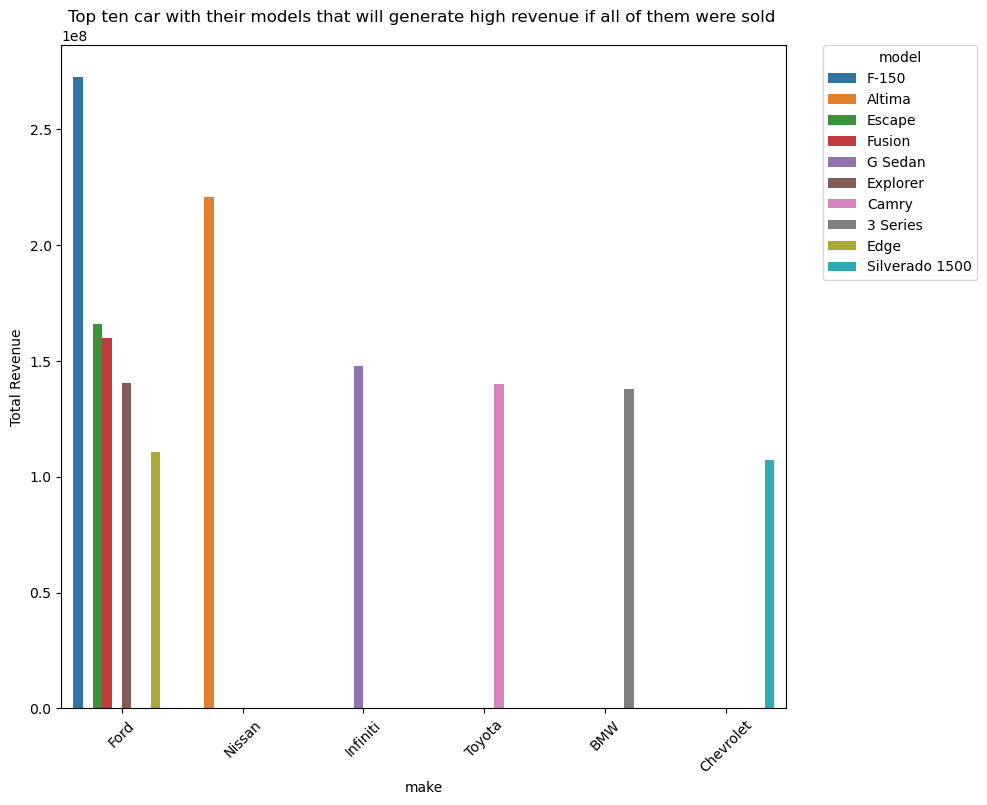

In [29]:
# a pivot table is made with data and now all their selling prices are aggregated for each model of make
#so that we get sum of sellig prices for each model,make combi


pivot_table = pd.pivot_table(data,values='sellingprice',index='make',columns='model',aggfunc='sum',fill_value=0)

#pivot table is now converted into a data set
df3=pivot_table.reset_index()

plt.figure(figsize=(10, 8))
df4=df3.melt(id_vars='make',var_name='model',value_name='Total Revenue')
#now selecting those (make,model) with top ten revenue
df5=df4.sort_values(by='Total Revenue',ascending=False).head(10)

ax=sns.barplot(data=df5,x='make',y='Total Revenue',hue='model')
plt.title("Top ten car with their models that will generate high revenue if all of them were sold ")
plt.xticks(rotation=45)
ax.legend(title='model',loc='upper left',bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.xticks(rotation=45);


#### With our data set, Ford F-150 model if sold all of them will fetch highest revenue, followed by nissn altima

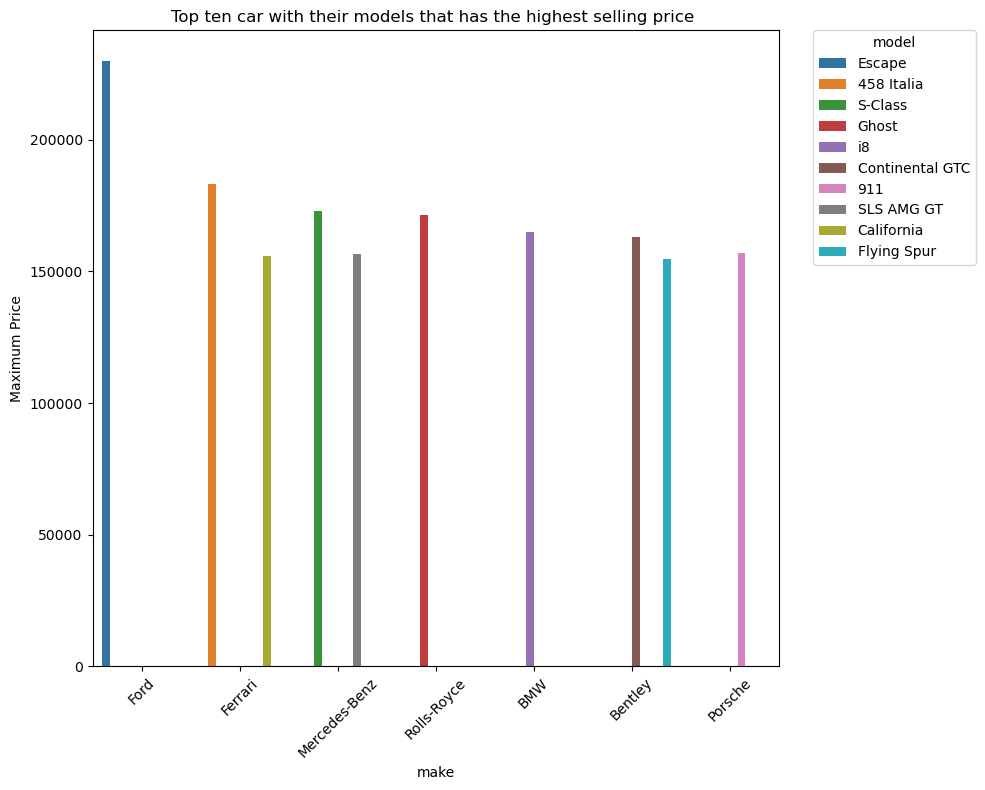

In [31]:
# a pivot table is made with the given data set  and now all their selling prices are aggregated for each model of make
#so that we get max of sellig prices for each (make,model) combi

pivot_table = pd.pivot_table(data,values='sellingprice',index='make',columns='model',aggfunc='max',fill_value=0)

 
#pivot table is now converted into a data set
df3=pivot_table.reset_index()

plt.figure(figsize=(10, 8))
df4=df3.melt(id_vars='make',var_name='model',value_name='Maximum Price')
#now selecting those (make,model) with top ten selling price
df5=df4.sort_values(by='Maximum Price',ascending=False).head(10)

ax=sns.barplot(data=df5,x='make',y='Maximum Price',hue='model')
plt.title("Top ten car with their models that has the highest selling price ")
plt.xticks(rotation=45)
ax.legend(title='model',loc='upper left',bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.xticks(rotation=45);





#### Ford Escape has the highest selling price followed by Ferrari 458 Italia

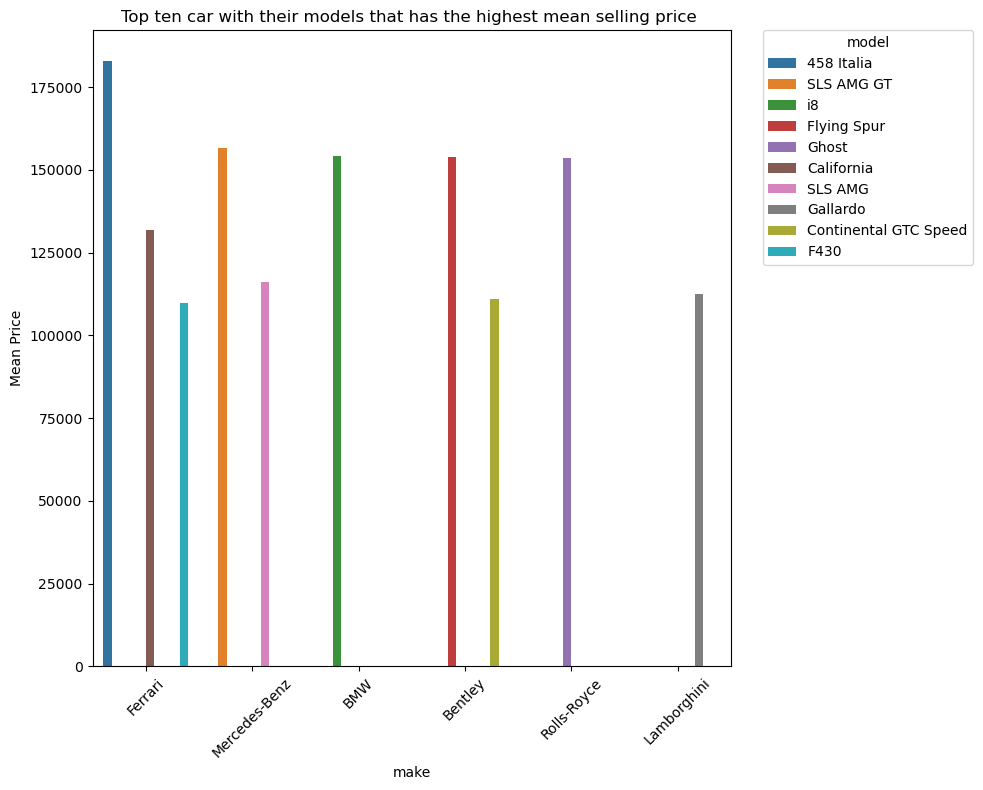

In [33]:
# a pivot table is made with the given data set  and now all their selling prices are aggregated for each model of make
#so that we get mean of sellig prices for each (make,model) combi

pivot_table = pd.pivot_table(data,values='sellingprice',index='make',columns='model',aggfunc='mean',fill_value=0)

 
#pivot table is now converted into a data set
df3=pivot_table.reset_index()

plt.figure(figsize=(10, 8))
df4=df3.melt(id_vars='make',var_name='model',value_name='Mean Price')
#now selecting those (make,model) with top ten mean prices
df5=df4.sort_values(by='Mean Price',ascending=False).head(10)

ax=sns.barplot(data=df5,x='make',y='Mean Price',hue='model')
plt.title("Top ten car with their models that has the highest mean selling price ")
plt.xticks(rotation=45)
ax.legend(title='model',loc='upper left',bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.xticks(rotation=45);

####   Ferrari 458 italia has the highest average selling prices in the data set foolwed by Mercedes SLS AMG GT

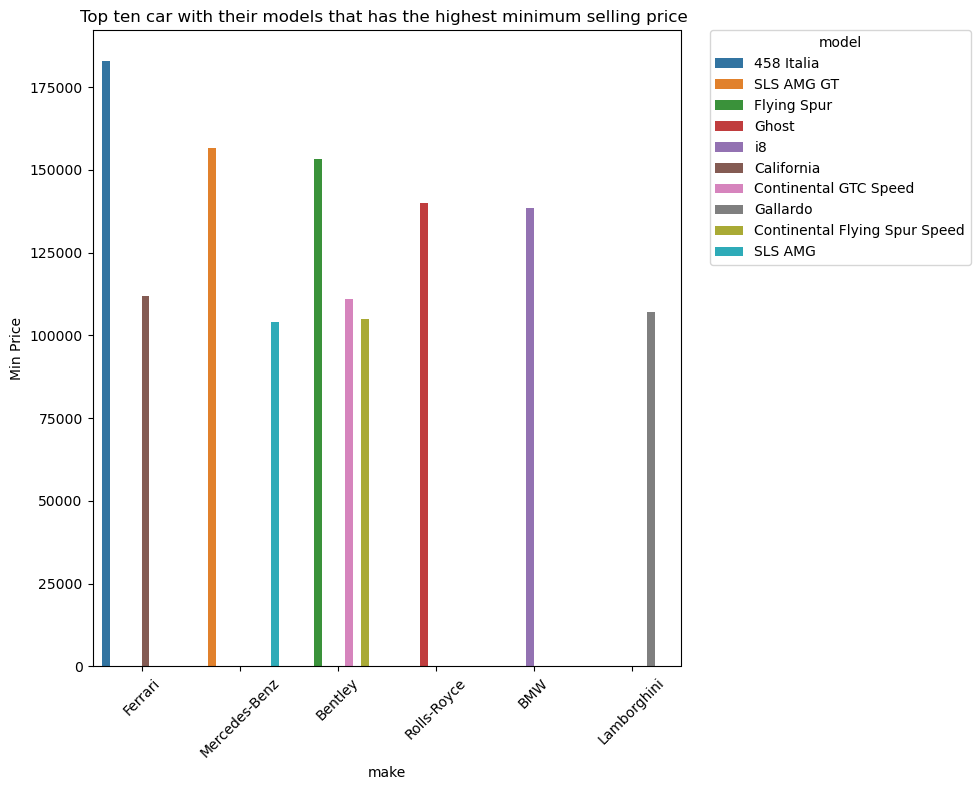

In [35]:
# a pivot table is made with the given data set  and now all their selling prices are aggregated for each model of make
#so that we get minimum of sellig prices for each (make,model) combi

pivot_table = pd.pivot_table(data,values='sellingprice',index='make',columns='model',aggfunc='min',fill_value=0)

 
#pivot table is now converted into a data set
df3=pivot_table.reset_index()

plt.figure(figsize=(10, 8))
df4=df3.melt(id_vars='make',var_name='model',value_name='Min Price')
#now selecting those (make,model) with top ten minimum selling prize
df5=df4.sort_values(by='Min Price',ascending=False).head(10)

ax=sns.barplot(data=df5,x='make',y='Min Price',hue='model')
plt.title("Top ten car with their models that has the highest minimum selling price ")
plt.xticks(rotation=45)
ax.legend(title='model',loc='upper left',bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.xticks(rotation=45);

#### The Ferrari 458 Italia has the highest minimum selling price among all models, followed by the Mercedes-Benz SLS AMG GT, and then the Bentley Flying Spur.

Text(0.5, 1.0, 'Top ten car brands with highest revenue if all were sold')

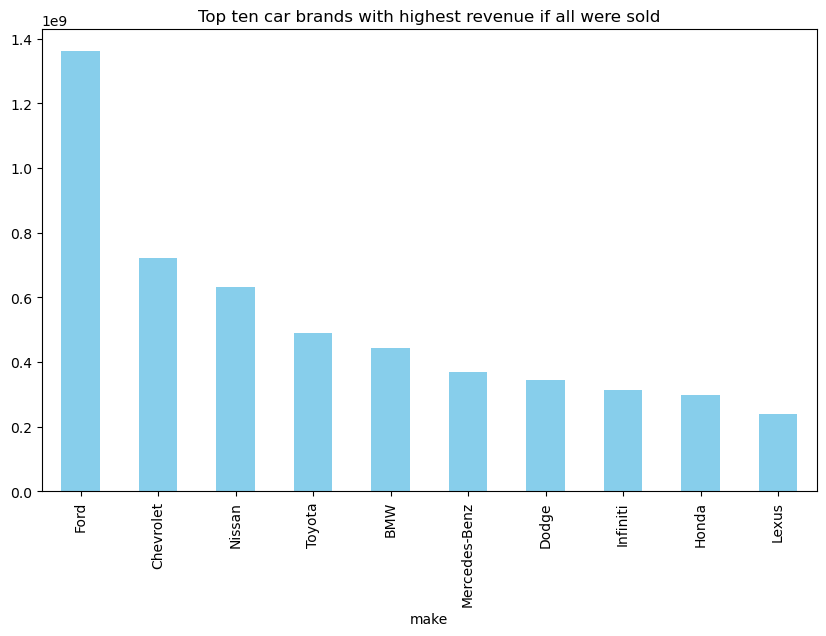

In [37]:
data.groupby('make')["sellingprice"].sum().sort_values(ascending=False).head(10).plot(kind='bar',color='skyblue', figsize=(10, 6))
plt.title("Top ten car brands with highest revenue if all were sold")



### Selling all Ford cars will generate the highest revenue, followed by Chevrolet, and then Nissan.






Text(0.5, 1.0, 'Top ten car brands  with highest average selling price')

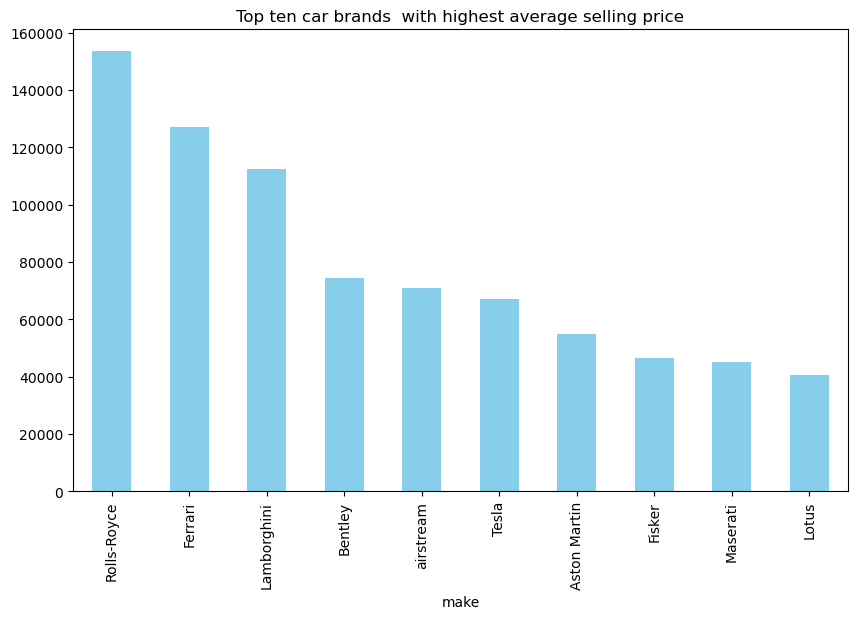

In [39]:
data.groupby('make')["sellingprice"].mean().sort_values(ascending=False).head(10).plot(kind='bar',color='skyblue',figsize=(10, 6))
plt.title("Top ten car brands  with highest average selling price")


#### On average, Rolls Royce brand has the highest average selling price

Text(0.5, 1.0, 'Top ten car models  with highest average selling price')

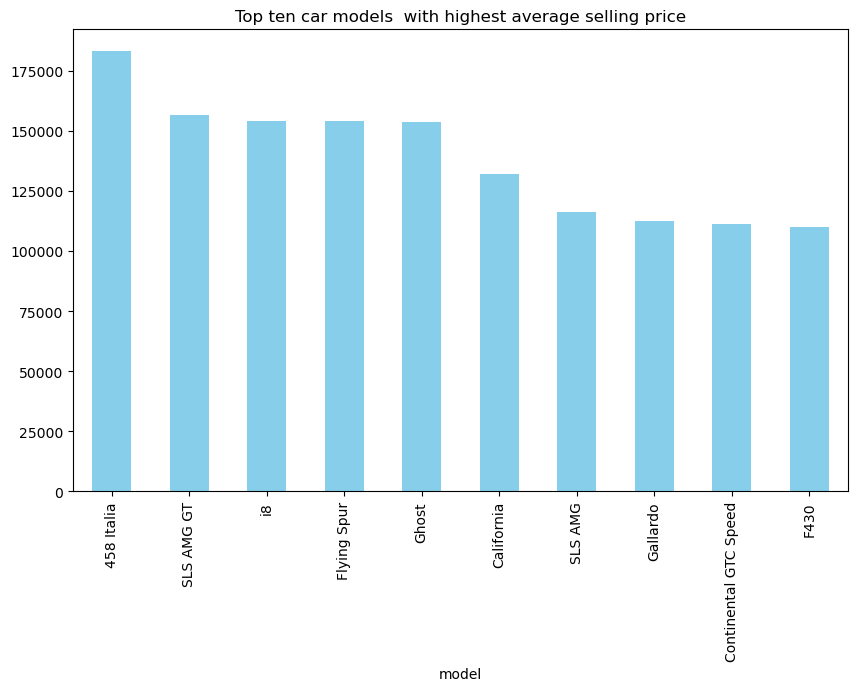

In [41]:
data.groupby('model')["sellingprice"].mean().sort_values(ascending=False).head(10).plot(kind='bar',color='skyblue',figsize=(10, 6))
plt.title("Top ten car models  with highest average selling price")


#### among all models of different car brands 458 italia has the highest average price

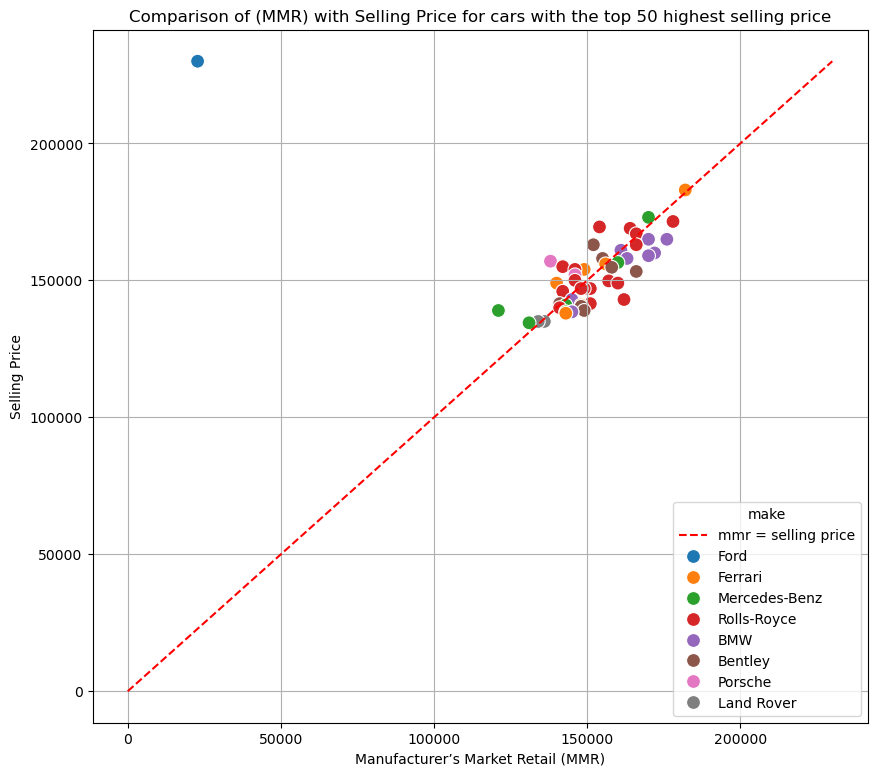

In [43]:
data1=data.sort_values(by="sellingprice",ascending=False).head(50)


plt.figure(figsize=(10, 9))
min_val = min(data['mmr'].min(), data['sellingprice'].min())
max_val = max(data['mmr'].max(), data['sellingprice'].max())
#Using the minimum value from both the MMR and selling price when plotting the x=y line ensures that the line fully covers the range of your data points on both axes.
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='mmr = selling price')
sns.scatterplot(x='mmr', y='sellingprice', data=data1, hue='make', s=100)
plt.title('Comparison of (MMR) with Selling Price for cars with the top 50 highest selling price')
plt.xlabel('Manufacturer’s Market Retail (MMR)')
plt.ylabel('Selling Price')
ax.legend(title='Make',loc='upper left',bbox_to_anchor=(1.05, 1), borderaxespad=0.)

#plt.legend(title='Make', loc='best')
plt.grid(True)
plt.show()

#### Some ford cars have high selling price above mmr. Points above x=y line shows higher selling price

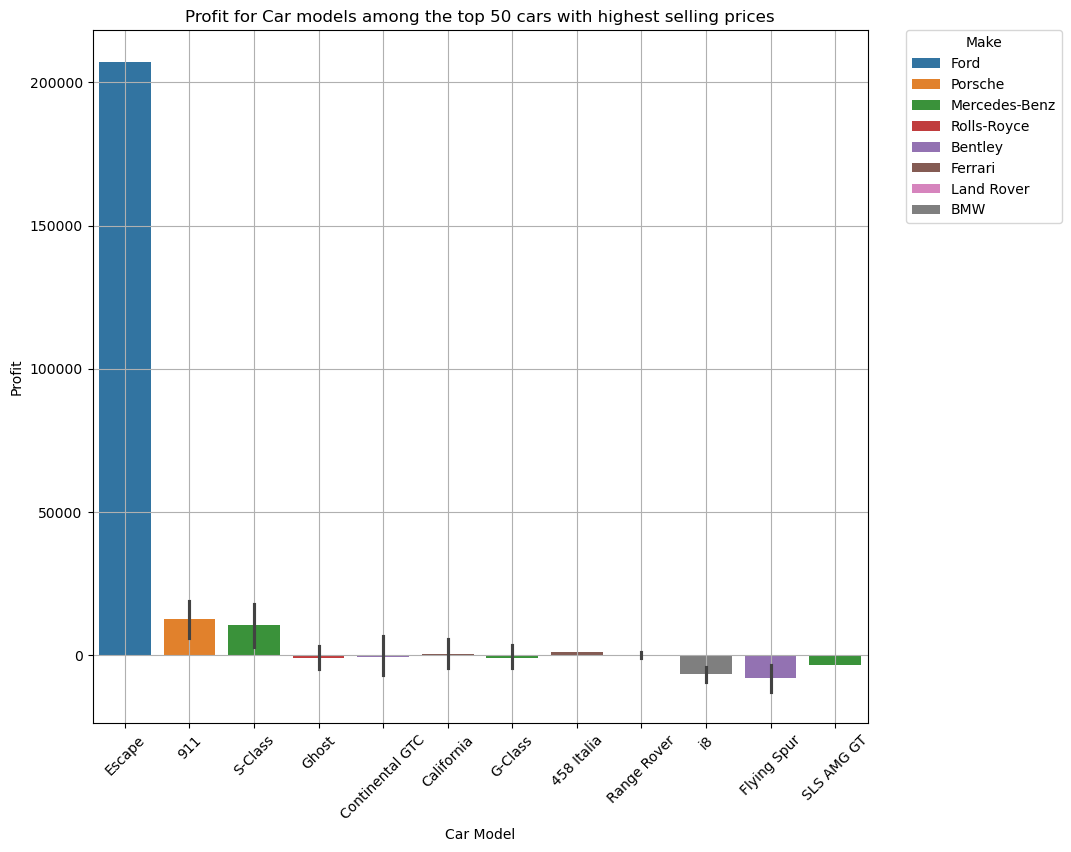

In [45]:
data['profit'] = data['sellingprice'] - data['mmr']
data1=data.sort_values(by="sellingprice",ascending=False).head(50)
data1=data1.sort_values(by="profit",ascending=False).head(50)
#plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 9))

ax=sns.barplot(x='model', y='profit', data=data1,hue='make')
ax.legend(title='Make',loc='upper left',bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.title('Profit for Car models among the top 50 cars with highest selling prices')
plt.xlabel('Car Model')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Ford escape has highest selling price over mmr, followed by Porche 911 and Mercedes S-class
#### Ghost,Continental GTC,California andG-class shows more or less the same
#### bmw i8, Bentley Flying Spur and Mercedes SLS AMG GT has lower selling price than mmr

In [47]:
correlation = data[['mmr', 'sellingprice']].corr()
correlation



,mmr,sellingprice
mmr,1.000000,0.983635
sellingprice,0.983635,1.000000


In [48]:
correlation.iloc[0, 1]


0.9836347525062373

#### Selling price is almost linearly corelated with mmr

In [50]:
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saledate2,profit
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014-12-16 12:30:00,1000.0
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014-12-16 12:30:00,700.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),2015-01-15 04:30:00,-1900.0
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),2015-01-29 04:30:00,250.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),2014-12-18 12:30:00,1000.0


In [51]:
data.groupby("make")["odometer"].mean().sort_values(ascending=False).head(20)

make
dodge tk      246997.000000
ford truck    194084.666667
dot           191734.000000
Geo           177356.736842
gmc           175648.600000
honda         154602.565517
gmc truck     152146.727273
hyundai       151175.150000
plymouth      145676.000000
toyota        145414.336842
lexus         143461.949580
ford          141088.959687
acura         140461.520000
Isuzu         140132.225490
Oldsmobile    139822.480769
chev truck    136490.000000
subaru        134812.600000
chrysler      132898.961722
mercury       132565.516129
oldsmobile    132435.100000
Name: odometer, dtype: float64

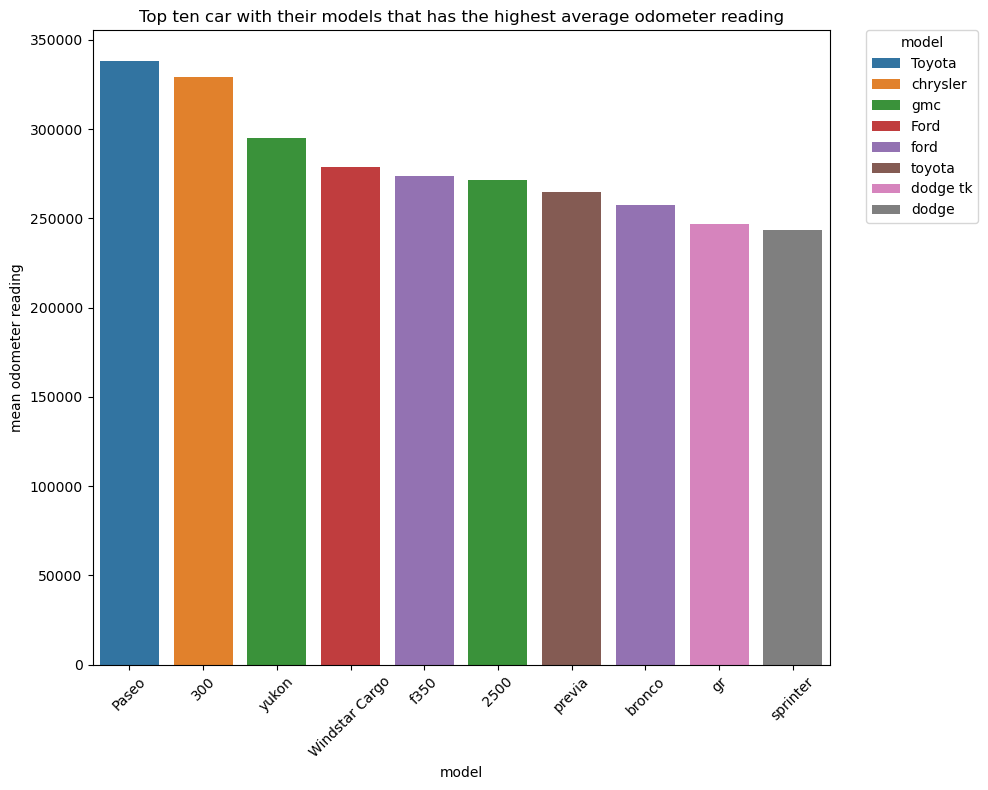

In [52]:
# a pivot table is made with the given data set  and now all their odometer reading are aggregated for each model of make
#so that we get mean of odometer reading for each (make,model) combi

pivot_table = pd.pivot_table(data,values='odometer',index='make',columns='model',aggfunc='mean',fill_value=0)

 
#pivot table is now converted into a data set
df3=pivot_table.reset_index()

plt.figure(figsize=(10, 8))
df4=df3.melt(id_vars='make',var_name='model',value_name='mean odometer reading')
#now selecting those (make,model) with top ten 'mean odometer reading' 
df5=df4.sort_values(by='mean odometer reading',ascending=False).head(10)

ax=sns.barplot(data=df5,x='model',y='mean odometer reading',hue='make')
plt.title("Top ten car with their models that has the highest average odometer reading")
plt.xticks(rotation=45)
ax.legend(title='model',loc='upper left',bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.xticks(rotation=45);

#### Toyota Paseo has the highest mean odometer reading

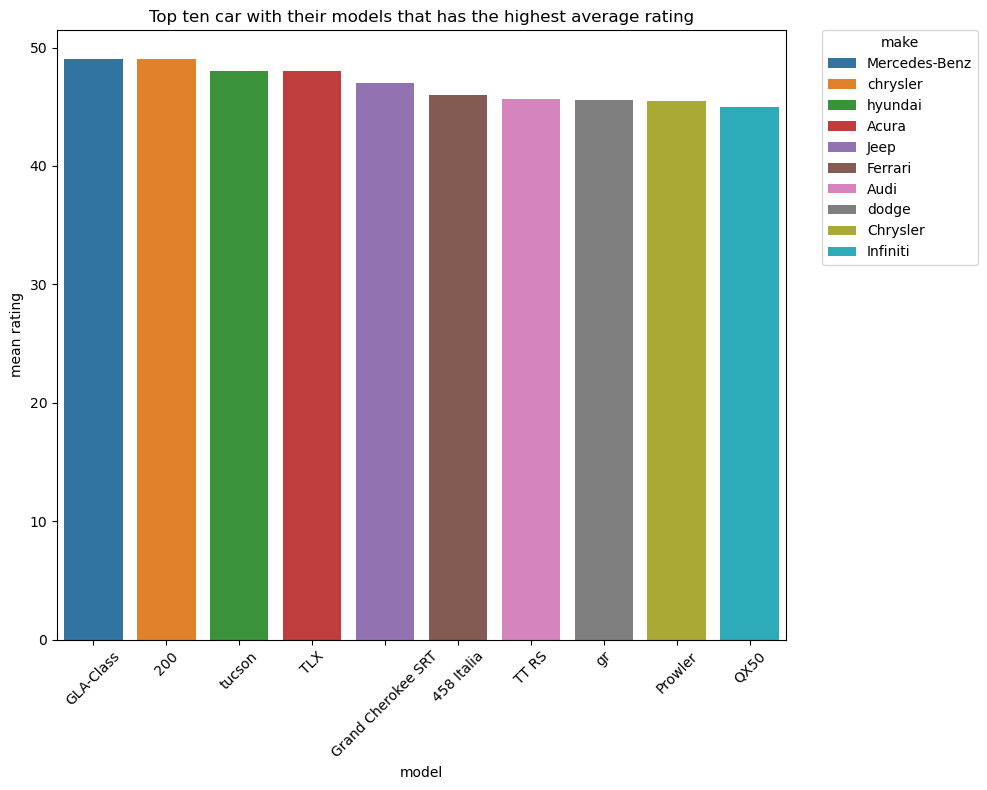

In [54]:
# a pivot table is made with the given data set  and now all their rating are aggregated for each model of make
#so that we get mean of rating for each (make,model) combi

pivot_table = pd.pivot_table(data,values='condition',index='make',columns='model',aggfunc='mean',fill_value=0)

 
#pivot table is now converted into a data set
df3=pivot_table.reset_index()

plt.figure(figsize=(10, 8))
df4=df3.melt(id_vars='make',var_name='model',value_name='mean rating')
#now selecting those (make,model) with top ten mean 'rating' 
df5=df4.sort_values(by='mean rating',ascending=False).head(10)

ax=sns.barplot(data=df5,x='model',y='mean rating',hue='make')
plt.title("Top ten car with their models that has the highest average rating")
plt.xticks(rotation=45)
ax.legend(title='make',loc='upper left',bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.xticks(rotation=45);

#### Mercedes Benz GLA CLass has highest average rating

<Axes: ylabel='count'>

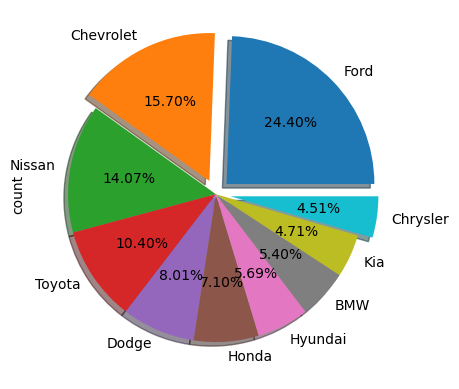

In [56]:
data['make'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie',shadow=True,explode=[0.1,0.1,0,0,0,0,0,0,0,0.1],autopct="%1.2f%%")
#pie.plot(kind='pie',shadow=True,explode=[0,0,0.1],autopct="%1.2f%%")	

#### in our data set Ford cars takes the majority, followed by Chevrolet .The least one is Chrysler

In [58]:
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saledate2,profit
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014-12-16 12:30:00,1000.0
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014-12-16 12:30:00,700.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),2015-01-15 04:30:00,-1900.0
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),2015-01-29 04:30:00,250.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),2014-12-18 12:30:00,1000.0


In [59]:
#disrepancy column is made to check if saledate is lesser than year of manufacture
# all the negative values , indicate a discrepancy which are denoted as nan
data["discrepancy"]=data["year"]-data["saledate2"].dt.year
data["discrepancy2"]=data["discrepancy"]

In [60]:
data.loc[data["discrepancy"]<0,'discrepancy2']=np.nan

In [61]:
data.isnull().sum()



year                 0
make                 0
model                0
trim                 0
body                 0
transmission         0
vin                  0
state                0
condition            0
odometer             0
color                0
interior             0
seller               0
mmr                  0
sellingprice         0
saledate             0
saledate2            0
profit               0
discrepancy          0
discrepancy2    544229
dtype: int64

In [62]:
### there 544229, negative values, which may imply the data set has errors in case of saledate data

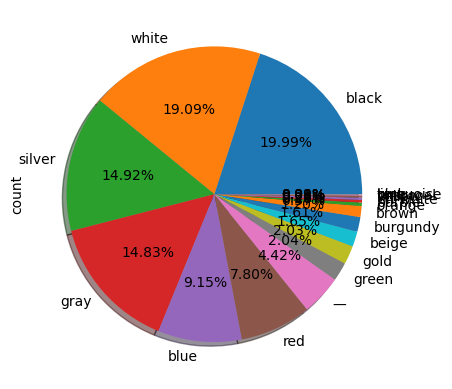

In [63]:
color=data["color"].value_counts().sort_values(ascending=False).plot(kind='pie',shadow=True,autopct="%1.2f%%")



#### Among used car sales, white and black dominates with around 19-20 percentage,followed by silver and gray almost 15 percent 

<Axes: ylabel='count'>

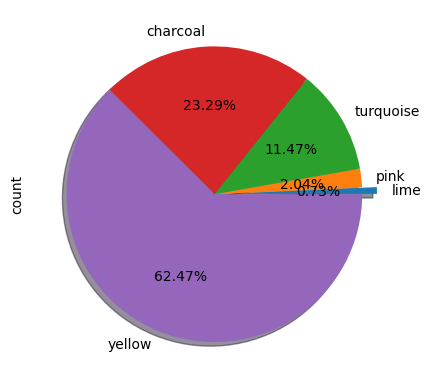

In [65]:
data["color"].value_counts().sort_values(ascending=True).head(5).plot(kind='pie',shadow=True,explode=[0.1,0,0,0,0],autopct="%1.2f%%")


### The five colors that appears least are lime, pink,turqoise,charcoal,and yellow

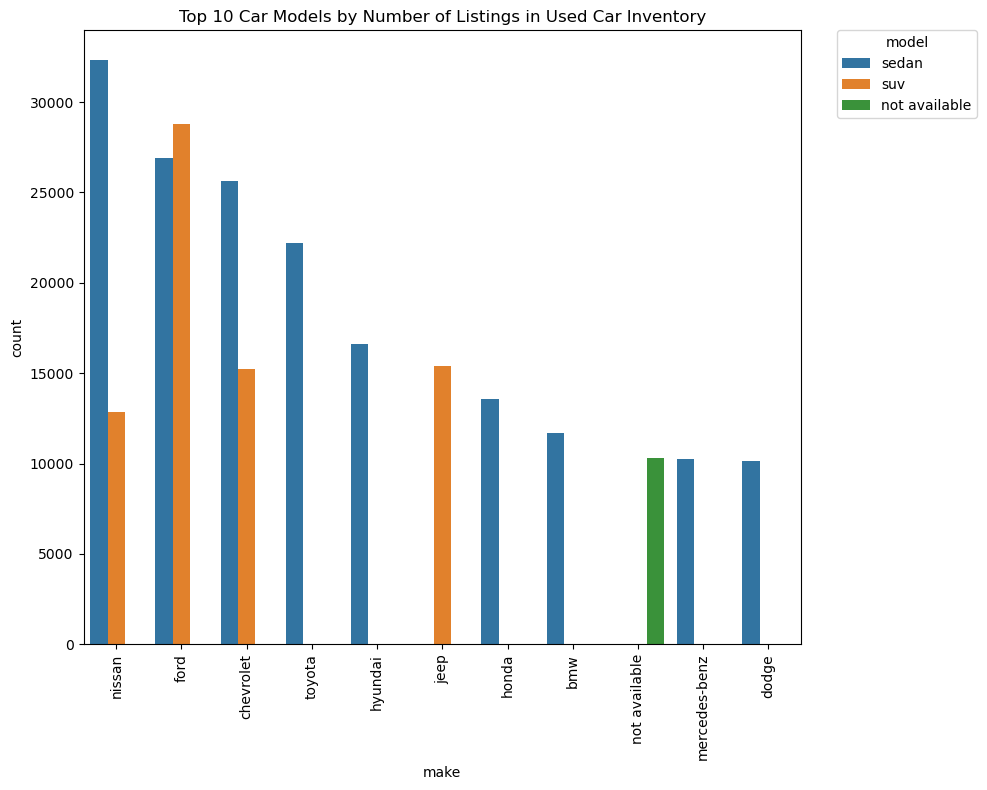

In [67]:
# a pivot table is made with data and now all their counts  are aggregated for each 'body' of 'make'
#so that we get count  for each model,make combi



data['body'] = data['body'].str.lower()
data['make'] = data['make'].str.lower()

pivot_table = pd.pivot_table(data,index='make',columns='body',aggfunc='size',fill_value=0)
#pivot table is now converted into a data set
df3=pivot_table.reset_index(drop=False)

df4=df3.melt(id_vars='make',var_name='bodytype',value_name='count')
plt.figure(figsize=(10, 8))

#now selecting those (make,model) with top ten revenue
df5=df4.sort_values(by='count',ascending=False).head(14)
df6=df5.groupby(['make','bodytype'])['count'].sum()
df6=df6.reset_index()
df6=df6.sort_values(by='count',ascending=False)
ax=sns.barplot(data=df6,x='make',y='count',hue='bodytype')


plt.title("Top 10 Car Models by Number of Listings in Used Car Inventory")
plt.xticks(rotation=90)
ax.legend(title='model',loc='upper left',bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
#plt.xticks(rotation=45);
#df4

#### "The Nissan sedan models have the highest number of listings for sale, followed by Ford SUVs."



<Axes: ylabel='count'>

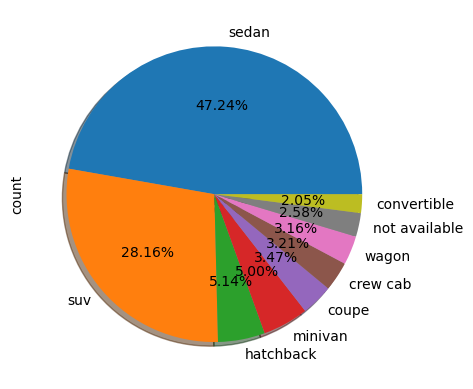

In [69]:
df4.groupby('bodytype')['count'].sum().sort_values(ascending=False).head(9).plot(kind='pie',shadow=True,autopct="%1.2f%%")

#### Most cars listed for sale are sedan type folowed by SUVs

<Axes: ylabel='count'>

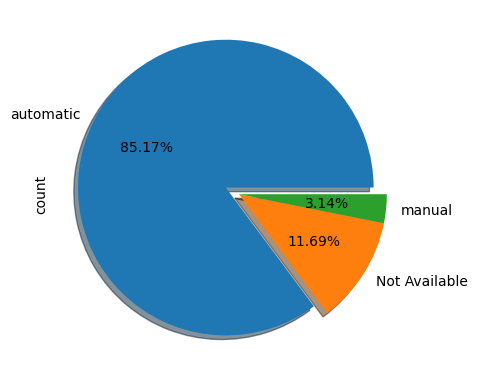

In [70]:
data["transmission"].value_counts().plot(kind='pie',shadow=True,explode=[0.1,0,0],autopct="%1.2f%%")

### more than 85 percent of used cars for sales are automatic

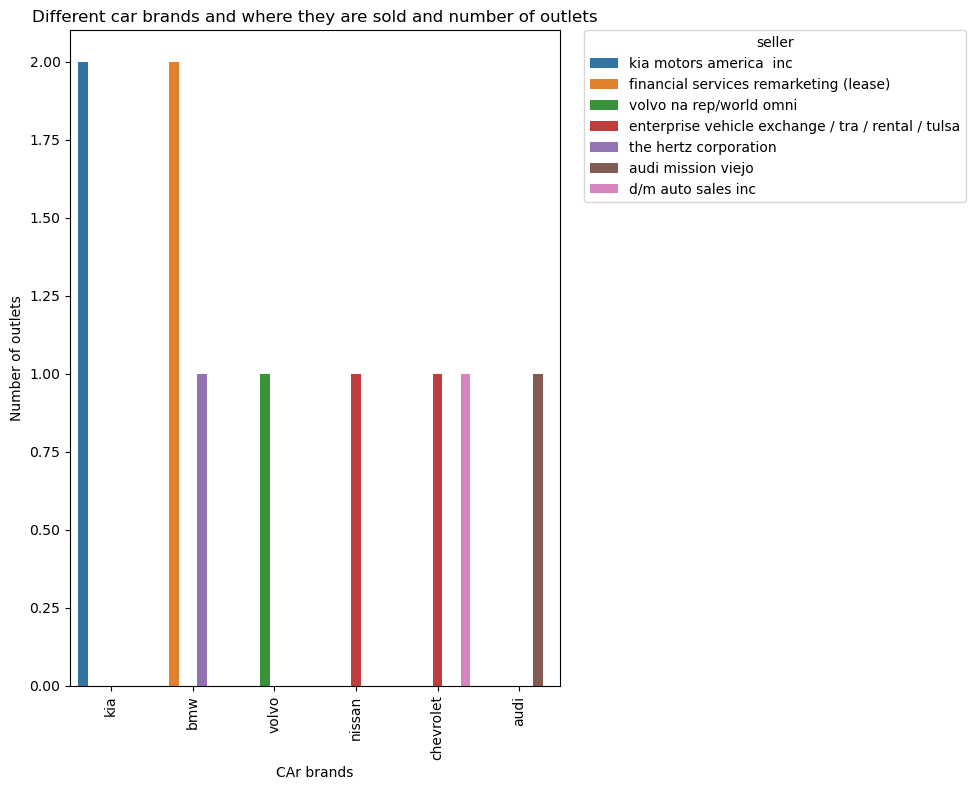

In [190]:
plt.figure(figsize=(10,8))


ax=sns.countplot(x='make', data=data.head(10), hue='seller') #group by( region)[payment method].count
ax.legend(title='seller',loc='upper left',bbox_to_anchor=(1.05, 1), borderaxespad=0)

plt.title("Different car brands and where they are sold and number of outlets")
plt.xticks(rotation=90)
plt.xlabel('CAr brands')
plt.ylabel('Number of outlets')
plt.tight_layout()